(-0.5, 389.5, 389.5, -0.5)

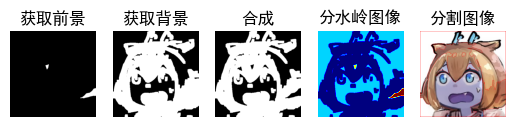

In [10]:
#使用Opencv实现分水岭算法，并进行测试。
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('touxiang.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
distance_transform = cv2.distanceTransform(open, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(distance_transform, 0.7 * distance_transform.max(), 255, cv2.THRESH_BINARY)

plt.rcParams["font.family"] = "SimHei"
sure_bg = cv2.dilate(open, kernel, iterations=3)
plt.subplot(151),plt.imshow(255-sure_fg,cmap="binary")
plt.title("获取前景")
plt.axis('off')
plt.subplot(152),plt.imshow(255-sure_bg,cmap="binary")
plt.title("获取背景")
plt.axis('off')

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.subplot(153),plt.imshow(255-unknown ,cmap="binary")
plt.title("合成")
plt.axis('off')

ret, markers1 = cv2.connectedComponents(sure_fg)
markers = markers1 + 1
markers[unknown == 255] = 0
plt.subplot(154),plt.imshow(markers,cmap='jet')
plt.title("获取标签")
plt.axis('off')

markers3 = cv2.watershed(img, markers)

img[markers3 == -1] = [255, 0, 0]
plt.title("分水岭图像")
plt.axis('off')
plt.subplot(155),plt.imshow(img)
plt.title("分割图像")
plt.axis('off')



